[*********************100%***********************]  2 of 2 completed


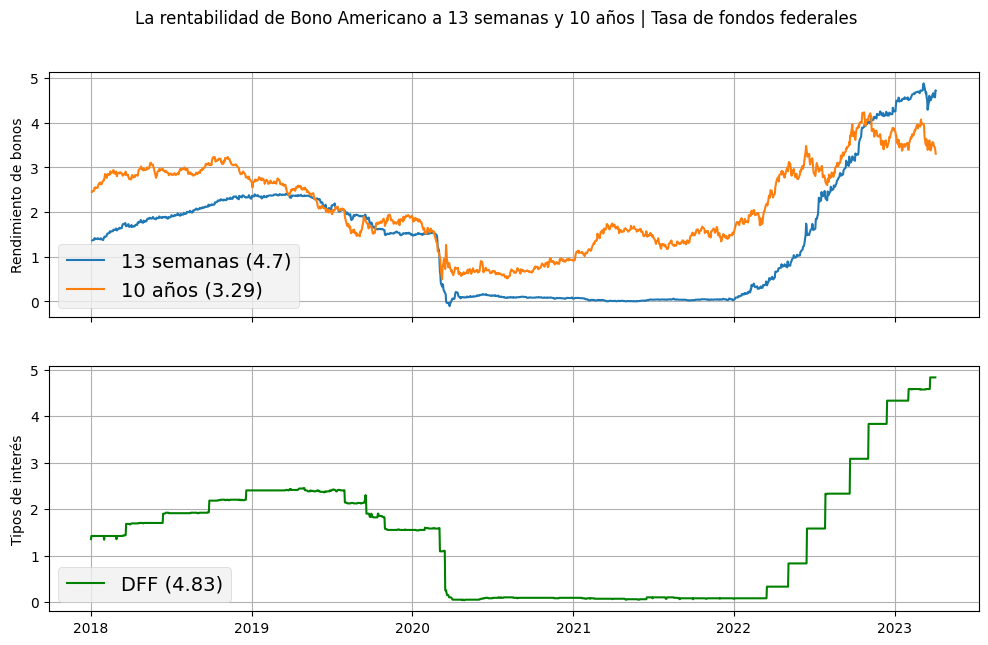

In [1]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import requests

# Definir el símbolo para los bonos de 2 y 10 años
bonos_simbolos = ["^TNX", "^IRX"]

# Descargar los datos desde 2020 hasta 2023
bonos = yf.download(bonos_simbolos, start="2018-01-01", end="2023-04-06")

# Descargar los datos de la tasa DFF de FRED para el período especificado
pdr.get_data_fred(symbols='DFF').session = requests.Session()
dff = pdr.DataReader('DFF', 'fred', start='2018-01-01', end='2023-04-06')


#Configuracion del tamaño del gracifo, titulo
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
plt.suptitle("La rentabilidad de Bono Americano a 13 semanas y 10 años | Tasa de fondos federales ", y = 0.97)
plt.style.use('fivethirtyeight')

ax[0].plot(bonos.index, bonos['Adj Close'],lw=1.5, ls="-")
ax[0].set_ylabel('Rendimiento de bonos')
ax[0].grid(True)

ax[1].plot(dff.index, dff['DFF'],lw=1.5, ls="-", color='green')
ax[1].set_ylabel('Tipos de interés')
ax[1].grid(True)


ax[0].legend([f"13 semanas ({bonos['Adj Close']['^IRX'].iloc[-1].round(2)})",f"10 años ({bonos['Adj Close']['^TNX'].iloc[-1].round(2)})"], loc="lower left")
ax[1].legend([f"DFF ({dff.DFF.iloc[-1]})"], loc="lower left")
plt.show()
